# Lista 8 (10 pkt.)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Zadanie 1 (2 pkt.)

Napisz funkcję **gen(a,b,p)**, która generuje listę punktów reprezentujących krzywą eliptyczną nad $\mathbb{Z}_p$ o równaniu $y^2=(x^3+ax+b)\mod p$.

In [2]:
def gen(a,b,p):
    result = []
    for i in range(p):
        for j in range(p):
            left = j**2 % p
            right = (i**3 + a*i + b) % p
            if(left==right):
                result.append([i, j]) 
    
    return result

In [3]:
print(gen(-1,0,7)==[[0, 0], [1, 0], [4, 2], [4, 5], [5, 1], [5, 6], [6, 0]])
print(gen(-1,0,11)==[[0, 0], [1, 0], [4, 4], [4, 7], [6, 1], [6, 10], [8, 3], [8, 8], [9, 4], [9, 7], [10, 0]])
print(gen(-1,1,7)==[[0, 1], [0, 6], [1, 1], [1, 6], [2, 0], [3, 2], [3, 5], [5, 3], [5, 4], [6, 1], [6, 6]])
print(gen(0,2,5)==[[2, 0], [3, 2], [3, 3], [4, 1], [4, 4]])

True
True
True
True


## Zadanie 2 (2 pkt.)

Napisz funkcję **add(P,Q,a,p)**, która dodaje do siebie punkty $P$ i $Q$ na krzywej eliptycznej nad ciałem $\mathbb{Z}_p$ z parametrem $a$. Wykorzystaj wzory z wykładu.

Uwaga 1: wszystkie operacje w tych wzorach są na ciele $\mathbb{Z}_p$ zatem tam gdzie mamy dzielenie mamy tak naprawdę mnożenie przez odwrotność w tym ciele, wykorzystaj tutaj funkcję **inv** z poprzedniej listy, może być potrzeba ją nieco zmodyfikować, ponieważ może się tu pojawić dzielenie przez zero, które daje nam punkt "w nieskończości" (na wykładzie: $\mathcal{O}$).

Uwaga 2: Uwzględnij również, że zarówno w wyniku dodawania jak i w argumentach dodawanie może pojawić się punkt "w nieskończoności", zwracaj go jako **nan**, tj. za pomocą **float('nan')**, do sprawdzania czy coś jest **nan** użyj **np.isnan()**.

In [4]:
def gcdExtended(a, b):
    # Base Case
    if a == 0 :
        return b,0,1

    gcd,x1,y1 = gcdExtended(b%a, a)
     
    # Update x and y using results of recursive
    # call
    x = y1 - (b//a) * x1
    y = x1
     
    return gcd,x,y

def inv(p,n):
    if np.isnan(p):
        return float('nan')
#     e, f = bezout(p, n) #nwd 1
    nwd, e, f = gcdExtended(p, n)
#     print("e = ", e, "f = ", f)
    
#     print(p*e, 1%n)
    if e!=0 and p*e % n == 1:
        return e

    if f!=0 and p*f % n == 1:
        return f
    
    return float('nan')

http://fizyka.umk.pl/~gniewko/didaktiki/MD2013-2014/wyk%C5%82ad12.pdf

In [5]:
def add(P,Q,a,p):
    #jesli jeten jest w nieskonczonosci to zwroc ten drugi
    if (np.isnan(P[0]) or np.isnan(P[1])) and not np.isnan(Q[0]) and not np.isnan(Q[1]):
        return Q
    
    if (np.isnan(Q[0]) or np.isnan(Q[1])) and not np.isnan(P[0]) and not np.isnan(P[1]):
        return P
    
    alfa = 0
    
    if(P[0]==Q[0] and P[1]==Q[1]):
        alfa = ((3*(P[0]**2) + a) * inv((2*P[1]), p)) #jesli to ten sam punkt (bez dzielenia przez 0)
    else:
        alfa = (Q[1]-P[1]) * inv(Q[0]-P[0], p)
        
    beta = (Q[1]-(alfa*Q[0])) % p
    
    x = (alfa**2 - P[0] - Q[0]) % p
    y = (-alfa*x - beta) % p
    
#     print(x, y)
    return [x, y]

In [6]:
print(add([4,2],[5,1],-1,7)==[6,0])
print(add([4,2],[4,2],-1,7)==[1,0])
print(add([4,2],[5,1],-1,7)==[6,0])
print(add([4,2],[float('nan'),float('nan')],-1,7)==[4,2])
print(np.isnan(add([float('nan'),float('nan')],[float('nan'),float('nan')],-1,7)))
print(np.isnan(add([0,0],[0,0],-1,7)))
print(add([2,0],[3,2],0,5)==[4,1])
print(np.isnan(add([2,0],[2,0],0,5)))

True
True
True
True
[ True  True]
[ True  True]
True
[ True  True]


In [7]:
print(add([4,2],[4, 2],-1,7))

[1, 0]


W oparciu o poprzednią funkcję napisz funkcję **multiply(n,P,a,p)**, która mnoży punkt $P$ razy liczbę naturalną $n$ na krzywej eliptycznej nad ciałem $\mathbb{Z}_p$ z parametrem $a$, tzn. dodaje ten punkt do siebie $n$ razy.

In [8]:
def multiply(n,P,a,p):
    result = [float('nan'), float('nan')]
    for i in range(n):
        if P[0] > result[0]:
            result = add(result, P, a, p)
        else:
            result = add(P, result, a, p)
    
    return result

In [9]:
print(multiply(1,[4,2],-1,7)==[4,2])
print(multiply(1,[4,2],-1,7)==[4,2])
print(multiply(3,[4,2],-1,7)==[4,5])
print(np.isnan(multiply(4,[4,2],-1,7)))
print(np.isnan(multiply(2,[float('nan'),float('nan')],-1,7)))
print(multiply(5,[2,0],0,5)==[2,0])
print(multiply(5,[3,3],0,5)==[3,2])

True
True
True
[ True  True]
[ True  True]
True
True


## Zadanie 3 (2 pkt.)

Narysuj na wykresie punkty (**plt.scatter()**) reprezentujące krzywą eliptyczną. Stosując funkcję **multiply()** przeanalizuj jaką grupę generuje każdy z punktów tej krzywej, wypisz te grupy. Nie automatyzuj tego, tzn. operacje na punktach wykonuj stosując wcześniejsze funkcje ale analizę poszczególnych grup przeprowadź ręcznie.

Na przykład dla krzywej $y^2=x^3-5x$ nad ciałem $\mathbb{Z}_5$ mamy 5 punktów (łącznie z punktem w nieskończoności, którego nie ma na wykresie, 6 punktów):

<img src="fig.png" width="500"/>

Punkt $P_0$ generuje dwuelementową grupę:

{$P_0,\mathcal{O}$},

bo $2P_0=\mathcal{O}$,

punkt $P_1$ generuje pięcioelementową grupę:

{$P_1,P_3,P_4,P_2,\mathcal{O}$}

bo $2P_1=P_3,3P_1=P_4,4P_1=P_2,5P_1=\mathcal{O}$

pozostałe elementy $P_2,P_3,P_4$ generują dokładnie tą samą grupę, zatem na tej krzywej mamy określone dwie grupy jedną dwuelementową i jedną pięcioelementową.

Przeprowadź podobną analizę dla przykładów:
1. krzywa nad ciałem $\mathbb{Z}_7$ o równaniu $y^2=x^3-x$
2. krzywa nad ciałem $\mathbb{Z}_5$ o równaniu $y^2=x^3-2x+1$

<function matplotlib.pyplot.show(*args, **kw)>

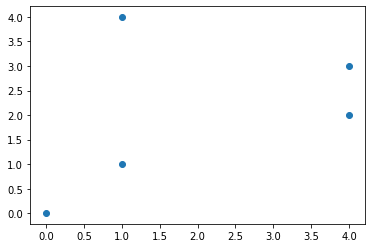

In [10]:
k0 = gen(-5, 0, 5)
npk0 = np.array(k0)
x, y = npk0.T
plt.scatter(x, y)
plt.show

In [11]:
print("0", k0[0], multiply(2, k0[0], -5, 5))
print("1", k0[1], multiply(5, k0[1], -5, 5))
print("2", k0[2], multiply(5, k0[2], -5, 5))
print("3", k0[3], multiply(5, k0[3], -5, 5))
print("4", k0[4], multiply(5, k0[4], -5, 5))

0 [0, 0] [nan, nan]
1 [1, 1] [nan, nan]
2 [1, 4] [nan, nan]
3 [4, 2] [nan, nan]
4 [4, 3] [nan, nan]


<function matplotlib.pyplot.show(*args, **kw)>

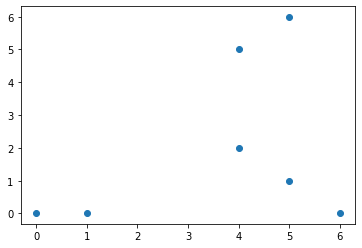

In [12]:
k1 = gen(-1, 0, 7)
npk1 = np.array(k1)
x, y = npk1.T
plt.scatter(x, y)
plt.show

In [13]:
print(k1[0], multiply(2, k1[0], -1, 7))
print(k1[1], multiply(2, k1[1], -1, 7))
print(k1[2], multiply(4, k1[2], -1, 7))
print(k1[3], multiply(4, k1[3], -1, 7))
print(k1[4], multiply(4, k1[4], -1, 7))
print(k1[5], multiply(4, k1[5], -1, 7))
print(k1[6], multiply(2, k1[6], -1, 7))

[0, 0] [nan, nan]
[1, 0] [nan, nan]
[4, 2] [nan, nan]
[4, 5] [nan, nan]
[5, 1] [nan, nan]
[5, 6] [nan, nan]
[6, 0] [nan, nan]


<function matplotlib.pyplot.show(*args, **kw)>

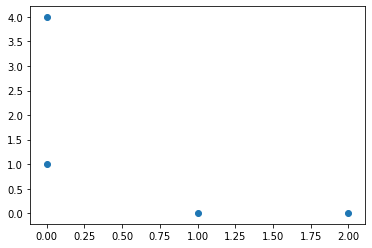

In [14]:
k2 = np.array(gen(-2, 1, 5))
x, y = k2.T
plt.scatter(x, y)
plt.show

In [15]:
print(k2[0], multiply(4, k2[0], -2, 5))
print(k2[1], multiply(4, k2[1], -2, 5))
print(k2[2], multiply(2, k2[2], -2, 5))
print(k2[3], multiply(2, k2[3], -2, 5))

[0 1] [nan, nan]
[0 4] [nan, nan]
[1 0] [nan, nan]
[2 0] [nan, nan]


/home/kamika/.local/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()
/home/kamika/.local/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars
/home/kamika/.local/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars


## Zadanie 4 (1 pkt)

Sprawdź numerycznie, korzystając z funkcji **gen()**, twierdzenie Hassego. Sprawdź, że ze wzrostem liczby pierwszej $p$ dla krzywej o parametrach $a=-1$, $b=0$ liczba punktów na krzywej podąża za oszacowaniem $p+1-2\sqrt{p}\leq\#E\leq p+1+2\sqrt{p}$. Narysuj wykres $\#E(p)$ i proste o równaniach $p+1-2\sqrt{p}$ oraz $p+1+2\sqrt{p}$.

Uwaga: Możesz wygenerować liczby pierwsze, np. w zakresie od 0 do 1000, za pomocą:

<function matplotlib.pyplot.show(*args, **kw)>

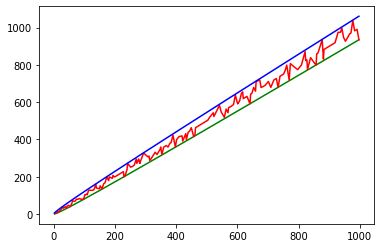

In [16]:
from sympy import primerange
primelist = list(primerange(0,1000))

less = []
lens = []
more = []
for p in primelist:
    points = gen(-1, 0, p)
    lens.append(len(points))
    less.append(p+1-(2*np.sqrt(p)))
    more.append(p+1+(2*np.sqrt(p)))
    
plt.plot(primelist, less, color="green")
plt.plot(primelist, lens, color="red")
plt.plot(primelist, more, color="blue")
plt.show

lub jakkolwiek inaczej.

## Zadanie 5 (2 pkt.)

Napisz funkcję **ord(G,a,p)** znajdującą rząd punktu $G$ na krzywej o parametrach $a$, $p$ (oznaczenia jak w poprzednich zadaniach). Rząd elementu to $n$ takie, że $nG=\mathcal{O}$. Znajdź punkt na krzywej o parametrach $a=-1$,$b=0$,$p=97$ o największym rzędzie, moze ich być więcej niż jeden, wybierz którykolwiek.

In [17]:
def ord(G,a,p):
    Gn = G
    n = 1
    while( not np.isnan(Gn)[0] ):
        n+=1
        Gn = multiply(n, G, a, p)
        
    return n

In [18]:
print(ord([4,4],-1,11)==3)
print(ord([8,8],-1,11)==6)
print(ord([3,2],-1,7)==3)
print(ord([3,5],-1,7)==3)
print(ord([3,2],0,5)==3)
print(ord([0,0],0,5)==2)

True
True
True
True
True
True


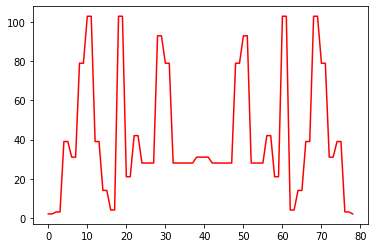

In [19]:
points = gen(-1, 0, 97)
result = []

for G in points:
    n = ord(G, 0, 97)
    result.append(n)
    
plt.plot(result, color="red")
plt.show()

In [20]:
maxidx = np.argmax(result)
print(maxidx, "-> ", points[maxidx])

10 ->  [15, 16]


## Zadanie 6 (1 pkt)

Prześledź działanie protokołu Diffiego-Helmana, jednak tym razem opertego o krzywe eliptyczne, i uzupełnij poszczególne kroki.

Alicja i Bob ustalają publicznie krzywą eliptyczą (czyli parametry $a$, $b$, $p$) w której będą działać oraz punkt na tej krzywej $G$. Weź krzywą z poprzedniego zadania oraz znaleziony w nim punkt.

In [21]:
a = -1
b = 0
G = [4,2] # z pierwszego zadania, pierwszy test
p = 7

Alicja wybiera losową liczbę naturalną $n$ z przedziału $[2,\#E-1]$, $\#E$ to liczba punktów na krzywej:

In [22]:
n=5 # #E=7

Następnie oblicza $A=nG$ zgodnie z zasadami mnożenia punktów na krzywej przez liczbe naturalną:

In [23]:
A=multiply(n, G, a, p)

To samo robi Bob, wybiera losową liczbę naturalną $m$ i oblicza $B=mG$:

In [24]:
m=3
B=multiply(m, G, a, p)

Liczby $n$ i $m$ są znane tylko, odpowiednio, Alicji i Bobowi, natomiast $A$ oraz $B$ są wymieniane publicznym kanałem. Bob otrzymuje $A$ i wykonuje operację $k_B=mA$, z kolei Alicja otrzymuje $B$ i wykonuje operację $k_A=nB$:

In [25]:
k_B=multiply(n, B, a, p)
k_A=multiply(m, A, a, p)

In [26]:
k_A==k_B

True

In [27]:
print(k_A, k_B)

[4, 5] [4, 5]


Zawuażmy, że $k_A=k_B$, wynika to z tego, że $k_A=nB=nmG$ oraz $k_B=mA=mnG$ a oczywiście $nm=mn$. Zatem Alicja i Bob dysponują tą samą liczbą, którą mogą użyć jako klucz do szyfrowania. Publicznie znane są wartości $a$, $b$, $p$, $G$, $nG$ oraz $mG$, jednak odzyskanie z nich $n$ i $m$ jest bardzo trudne przy odpwiednim doborze krzywej i punktu na niej.